In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Since there is no column name so lets add that
# column 0 to 59 so they will be named as Feature 0,..,Feature 59
# and lets name target column as Class

# First lets make a lost of column name
new_column_names = []
for i in range(60):
    new_column_names.append(f"Feature {i}")

new_column_names.append("Class")

In [3]:
train = pd.read_csv('../input/sonaralldata/sonar.all-data.csv',header=None, names= new_column_names)
train.head()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 51,Feature 52,Feature 53,Feature 54,Feature 55,Feature 56,Feature 57,Feature 58,Feature 59,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
# Replacing M with 0 and R with 1
train = train.replace({'Class': {'M': 0, 
                                'R': 1}})

In [5]:
x = train.drop("Class",axis=1)
y = train['Class']

In [6]:
y.value_counts()

0    111
1     97
Name: Class, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [8]:
# splitting the dataset into train and test dataset with 4:1 ratio (80%-20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 26,stratify=y)

## Training on different algorithms

### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()
# Pass training data into model
lreg.fit(x_train, y_train)

LogisticRegression()

In [10]:
# Getting prediciton on x_test
y_pred_lreg = lreg.predict(x_test)

In [11]:
# Scoring our model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))


# Accuracy of our model
print('--'*50)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,8)
print('Accuracy = ', logreg_accuracy,'%')


Logistic Regression


Confusion Matrix
[[16  6]
 [ 5 15]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.73      0.74        22
           1       0.71      0.75      0.73        20

    accuracy                           0.74        42
   macro avg       0.74      0.74      0.74        42
weighted avg       0.74      0.74      0.74        42

----------------------------------------------------------------------------------------------------
Accuracy =  73.80952381 %


**We have a accuracy of 99.90%**

### LINEAR SUPPORT VECTOR CLASSIFIER

In [12]:
%%time
from sklearn.svm import SVC
# Instantiate the model
svc = SVC()
# Fit the model on training data
svc.fit(x_train, y_train)

CPU times: user 2.31 ms, sys: 1.06 ms, total: 3.38 ms
Wall time: 3.39 ms


SVC()

In [13]:
# Getting the predictions for x_test
y_pred_svc = svc.predict(x_test)

In [14]:
print('Support Vector Classifier')
print('\n')
# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc))
print('--'*50)

# Classification report
print('Classification Report')
print(classification_report(y_test, y_pred_svc))

# Accuracy
print('--'*50)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100,8)
print('Accuracy = ', svc_accuracy,'%')

Support Vector Classifier


Confusion Matrix
[[19  3]
 [ 5 15]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.83      0.75      0.79        20

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42

----------------------------------------------------------------------------------------------------
Accuracy =  80.95238095 %


### K-NEAREST NEIGHBORS

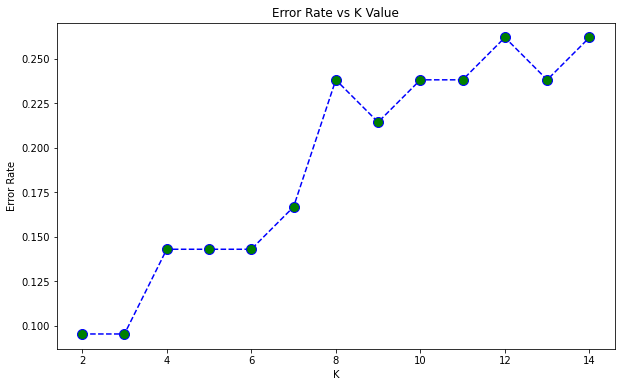

CPU times: user 352 ms, sys: 162 ms, total: 514 ms
Wall time: 329 ms


In [15]:
%%time
from sklearn.neighbors import KNeighborsClassifier

# in knn we need to select a value of nearest neighbour, for now lets use a for loop. If accuarcy
# is better than other models then we would search for optimal parameter

error_rate = []

for i in range (2,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(2,15), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [16]:
# now using above data to train with n_neighbors having least error rate

n_value = 0
min_error = float('inf')
for idx,error in enumerate(error_rate):
    if min_error>error:
        min_error=error
        n_value=idx+2

knn = KNeighborsClassifier(n_neighbors = n_value)
# Fit new KNN on training data
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [17]:
# Predict KNN
y_pred_knn_op = knn.predict(x_test)

In [18]:
print('K-Nearest Neighbors(KNN)')
print('k =',n_value)

# Confusion Matrix
print('\n')
print(confusion_matrix(y_test, y_pred_knn_op))

# Classification Report
print('--'*50)
print('Classfication Report',classification_report(y_test, y_pred_knn_op))

# Accuracy
print('--'*50)
knn_op_accuracy =round(accuracy_score(y_test, y_pred_knn_op)*100,8)
print('Accuracy = ',knn_op_accuracy,'%')

K-Nearest Neighbors(KNN)
k = 2


[[22  0]
 [ 4 16]]
----------------------------------------------------------------------------------------------------
Classfication Report               precision    recall  f1-score   support

           0       0.85      1.00      0.92        22
           1       1.00      0.80      0.89        20

    accuracy                           0.90        42
   macro avg       0.92      0.90      0.90        42
weighted avg       0.92      0.90      0.90        42

----------------------------------------------------------------------------------------------------
Accuracy =  90.47619048 %


### RANDOM FOREST

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create model object
rfc = RandomForestClassifier(n_estimators = 250,n_jobs=-1)
# Fit model to training data
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

In [20]:
print('Random Forest')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc))

# Classification report
print('--'*50)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc))

# Accuracy
print('--'*50)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100,8)
print('Accuracy = ', rf_accuracy,'%')

Random Forest


Confusion Matrix
[[20  2]
 [ 5 15]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.88      0.75      0.81        20

    accuracy                           0.83        42
   macro avg       0.84      0.83      0.83        42
weighted avg       0.84      0.83      0.83        42

----------------------------------------------------------------------------------------------------
Accuracy =  83.33333333 %


### XGBoost Classifier

In [21]:
from xgboost import XGBClassifier

# Create model object
xgb = XGBClassifier(n_jobs=-1)

# Fit model to training data
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:12:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
print('XGBoost Classifer')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_xgb))

# Classification report
print('--'*50)
print('Classification Report')
print(classification_report(y_test, y_pred_xgb))

# Accuracy
print('--'*50)
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb)*100,8)
print('Accuracy = ', xgb_accuracy,'%')

XGBoost Classifer


Confusion Matrix
[[19  3]
 [ 2 18]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.86      0.90      0.88        20

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42

----------------------------------------------------------------------------------------------------
Accuracy =  88.0952381 %


In [23]:
models = pd.DataFrame({
     'Model': ['Logistic Regression', 'Linear SVC', 
               'K-Nearest Neighbors', 'Random Forest','XGBoost Classifier'],
    'Score': [logreg_accuracy, svc_accuracy, 
               knn_op_accuracy, rf_accuracy,xgb_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,K-Nearest Neighbors,90.476190
4,XGBoost Classifier,88.095238
3,Random Forest,83.333333
1,Linear SVC,80.952381
0,Logistic Regression,73.809524
